# **Import Libraries**

In [0]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation, Conv2D, MaxPooling2D, BatchNormalization
from keras import backend as K
import numpy as np
import pickle
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
import cv2
from google.colab.patches import cv2_imshow

# Import Data

In [0]:
with open('trainX.pickle', 'rb') as f1:
    trainX = pickle.load(f1)

with open('trainY.pickle', 'rb') as f2:
    trainY = pickle.load(f2)

with open('testX.pickle', 'rb') as f3:
    testX = pickle.load(f3)

In [322]:
print(trainX.shape)
print(trainY.shape)
print(testX.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)


In [323]:
K.image_data_format()

'channels_last'

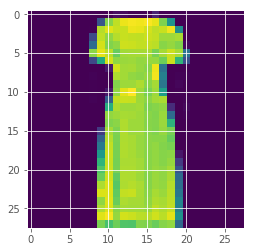

In [324]:
plt.imshow(trainX[50,:].reshape((28,28)))

# Split into testing and training data

In [0]:
trainX, test_X, trainY, test_Y = train_test_split(trainX, trainY, test_size=0.15, random_state=42)

In [326]:
print(trainX.shape)
print(trainY.shape)
print(test_X.shape)
print(test_Y.shape)

(51000, 28, 28)
(51000,)
(9000, 28, 28)
(9000,)


# Reshaping Data

In [0]:
im_shape = (28,28,1)
trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
test_X = test_X.reshape((test_X.shape[0], 28, 28, 1))
testX = testX.reshape((testX.shape[0], 28, 28, 1))

trainX = trainX.astype("float32") / 255.0
test_X = test_X.astype("float32") / 255.0
testX = testX.astype("float32") / 255.0

# Handling categorical values

In [0]:
trainY = keras.utils.to_categorical(trainY, 10)
test_Y = keras.utils.to_categorical(test_Y, 10)

# Model

In [0]:
model = Sequential()


model.add(Conv2D(32, (3, 3), padding="same",
input_shape=im_shape))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(32, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation("relu"))
model.add(BatchNormalization(axis=-1))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation("relu"))
model.add(BatchNormalization())
model.add(Dropout(0.5))

model.add(Dense(10))
model.add(Activation("softmax"))

model.compile(loss="categorical_crossentropy", optimizer='adam', metrics=["accuracy"])

In [330]:
H = model.fit(trainX, trainY, validation_data=(test_X, test_Y), batch_size=128, epochs=10)

Train on 51000 samples, validate on 9000 samples
Epoch 1/10
51000/51000 [==============================] - 12s 235us/step - loss: 0.4846 - acc: 0.8349 - val_loss: 0.2959 - val_acc: 0.8918
Epoch 2/10
51000/51000 [==============================] - 8s 150us/step - loss: 0.3064 - acc: 0.8906 - val_loss: 0.2619 - val_acc: 0.9038
Epoch 3/10
51000/51000 [==============================] - 8s 150us/step - loss: 0.2578 - acc: 0.9090 - val_loss: 0.2337 - val_acc: 0.9149
Epoch 4/10
51000/51000 [==============================] - 8s 149us/step - loss: 0.2362 - acc: 0.9137 - val_loss: 0.2254 - val_acc: 0.9169
Epoch 5/10
51000/51000 [==============================] - 8s 149us/step - loss: 0.2186 - acc: 0.9190 - val_loss: 0.2107 - val_acc: 0.9222
Epoch 6/10
51000/51000 [==============================] - 8s 149us/step - loss: 0.2044 - acc: 0.9256 - val_loss: 0.2095 - val_acc: 0.9240
Epoch 7/10
51000/51000 [==============================] - 8s 148us/step - loss: 0.1916 - acc: 0.9295 - val_loss: 0.2045 - 

In [331]:
preds = model.predict(test_X)
 
print("[INFO] evaluating network...")
print(classification_report(test_Y.argmax(axis=1), preds.argmax(axis=1)))

[INFO] evaluating network...
              precision    recall  f1-score   support

           0       0.92      0.85      0.88       899
           1       0.99      0.99      0.99       906
           2       0.86      0.94      0.90       901
           3       0.94      0.92      0.93       905
           4       0.88      0.89      0.88       924
           5       0.99      0.99      0.99       916
           6       0.82      0.82      0.82       925
           7       0.96      0.97      0.97       830
           8       0.99      0.99      0.99       905
           9       0.97      0.97      0.97       889

    accuracy                           0.93      9000
   macro avg       0.93      0.93      0.93      9000
weighted avg       0.93      0.93      0.93      9000



# Plotting Loss against Accuracy

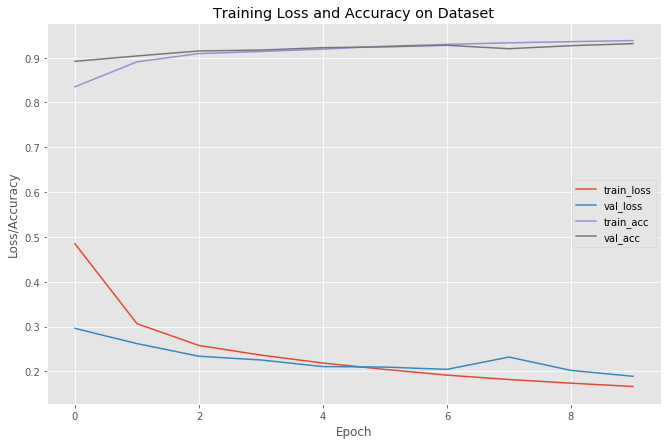

In [332]:
N = 10
plt.style.use("ggplot")
plt.figure(figsize=(11,7))
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Loss and Accuracy on Dataset")
plt.xlabel("Epoch")
plt.ylabel("Loss/Accuracy")
plt.legend(loc="best")